# Project description

In this project we will study the revenue for an online store. We have a list of hypotheses that could boost revenue. We will choose which of these hypotheses to prioritize and then analyze the result using an A / B test.

# Part 1. Prioritizing Hypotheses


Importing data and libraries



In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('max_colwidth', 400)

import warnings
warnings.filterwarnings("ignore")


In [2]:
hypotheses = pd.read_csv('datasets/hypotheses_us.csv', sep=';')

Previewing first five rows and general information of data.



In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses.head(9)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


We have a dataframe with 5 columns and 9 rows which correspond to 9 hypotheses. The columns contain the description of the hypothesis and the parameters Reach, Impact, Confidence and Effort. Each hypothesis has been assigned a value from 1 to 10 in correspondence with each parameter.

We can prioritize the assumptions using the ICE and RICE frameworks.

### Calculate ICE score

In [5]:
hypotheses['ice_score'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

In [6]:
hypotheses.sort_values('ice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice_score
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


Based on the ICE score, the strongest hypotheses are the number 8, 0, 7, and 6.

### Calculate RICE score

In [7]:
hypotheses['rice_score'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

In [8]:
hypotheses.sort_values('rice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ice_score,rice_score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


Based on the RICE scores, the best hypotheses are the number 7, 2,0 and 6.

The difference between the ICE and he RICE is that the RICE method takes into account, not only how strong an hypothesis is, but also how many users will be affected.

### Visualize ICE and RICE scores

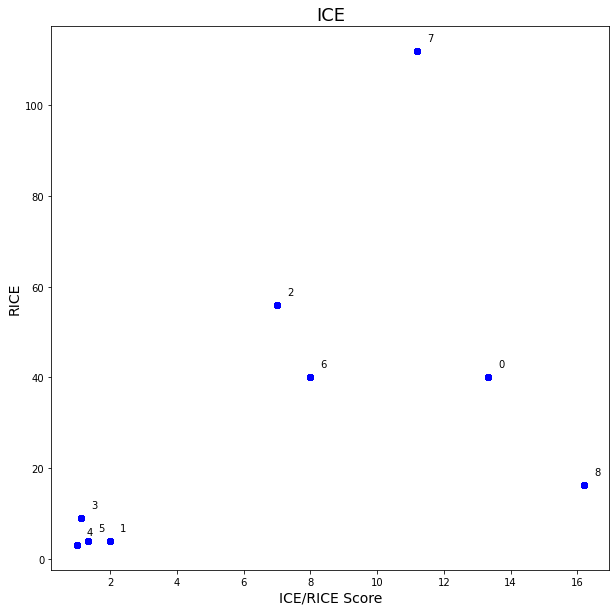

In [9]:
x = hypotheses['ice_score'].values
y = hypotheses['rice_score'].values
hypotheses = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('ICE/RICE Score', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE', fontsize=18)

for i, txt in enumerate(hypotheses):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='o', color='blue')

# Part 2. A/B Test Analysis


In [10]:
orders = pd.read_csv('datasets/orders_us.csv')

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


For each order we have the transaction ID, the customer ID, the date it was placed and the group A or B to which the customer was assigned.

In [13]:
groupAB = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'})
groupAB = groupAB[groupAB['group'] == 2]

In [14]:
print("There are {} visitors who have been placed in both group A and B".format(len(groupAB)))

There are 58 visitors who have been placed in both group A and B


In [15]:
orders = orders[~orders['visitorId'].isin(groupAB['visitorId'])]

Before proceeding with the A / B test, we should check if the users had been correctly entered in the various groups. 

I found that 58 clients were assigned to both group A and B.

This is a mistake and unfortunately I have no way of determining which group these clients belong to, so we will continue the test without considering these users.

In [16]:
visits = pd.read_csv('datasets/visits_us.csv')

In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# converting columns in the righ type and formatting 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

We can start the test by determining the cumulative revenue by group and cumulative average order size by group. These metrics help us track changes in the experimental results at each day of the test and can help you decide whether to continue the test.

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


### Ploting the Cumlative Revenue per Month

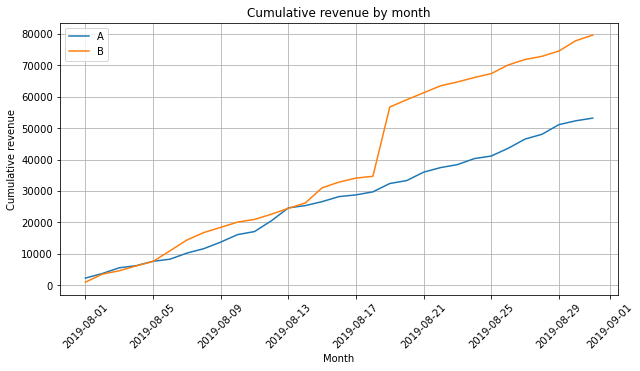

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulative revenue by month')
plt.xlabel('Month')
plt.ylabel('Cumulative revenue')
plt.grid()
plt.legend() 
plt.show()

Both the cumulative revenues of group A and group B are steadily increasing for the entire test. At some point, however, the revenue of group B had a spike: this may imply either a surge in the number of orders or the presence of very expensive orders.

### Ploting Cumulative Average Order Size per Month

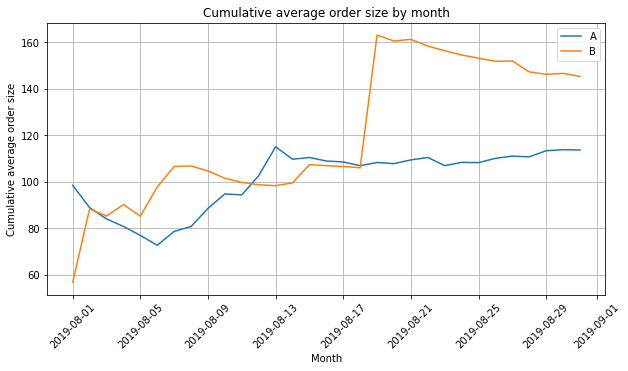

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulative average order size by month')
plt.xlabel('Month')
plt.ylabel('Cumulative average order size')
plt.grid()
plt.legend() 
plt.show()

For the group A the cumulative average purchase size stabilized by the end of the test.

For group B they are still fluctuating but this may be due to the presence of some really big order. We will deal with the presence of these outliers later in the project

### Ploting Relative Differences in Average Purchase Order

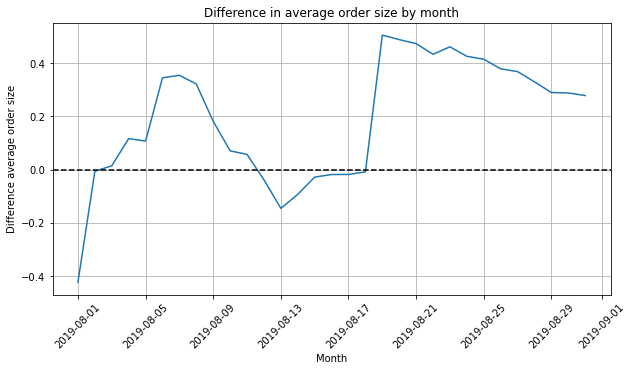

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(10, 5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('Difference in average order size by month')
plt.xlabel('Month')
plt.ylabel('Difference average order size')
plt.grid()
plt.show()

We can see considerable and sudden changes which also suggests the presence of some abnormally large orders

### Ploting  cumulative conversion rate

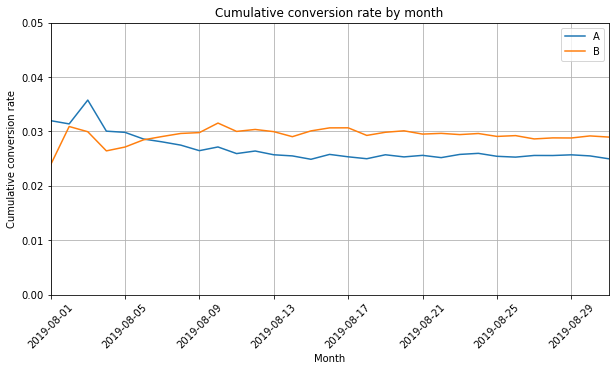

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulative conversion rate by month')
plt.xlabel('Month')
plt.ylabel('Cumulative conversion rate')
plt.grid()
plt.legend() 
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 
plt.show()


Comulative conversion ratehas stabilized for both groups. The group B performs better than group A

### Ploting Relative Difference in Conversion Rate

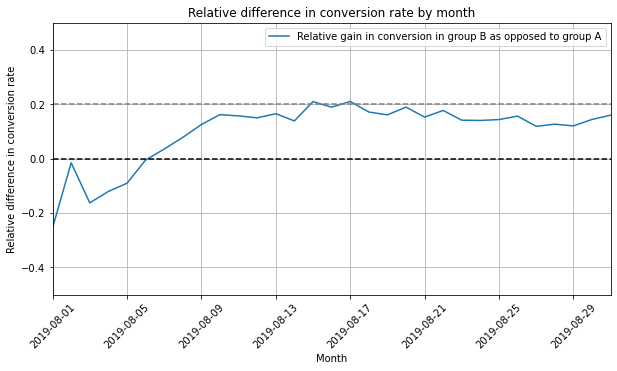

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('Relative difference in conversion rate by month')
plt.xlabel('Month')
plt.ylabel('Relative difference in conversion rate')
plt.grid()
plt.legend() 
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5]) 
plt.show()


 The relative difference in conversion rate help us to see better the difference between the groups: Group B has a better conversion for almost the entire duration of the test.

### Outlies

In [26]:
ordersNumber = orders.groupby(['visitorId', 'group'], as_index=False).agg({'transactionId':pd.Series.nunique})
ordersNumber.columns = ['visitorId', 'group', 'orders']

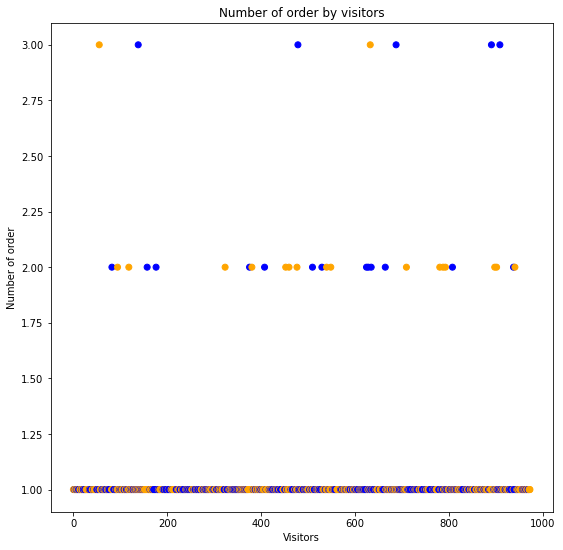

In [27]:
plt.figure(figsize=(9, 9))
x_values = pd.Series(range(0, len(ordersNumber['orders'])))
colors = {'A':'blue', 'B':'orange'}

plt.scatter(x_values, ordersNumber['orders'], c=ordersNumber['group'].apply(lambda x: colors[x])) 
plt.title('Number of order by visitors')
plt.xlabel('Visitors')
plt.ylabel('Number of order')
plt.show()

In [28]:
print(np.percentile(ordersNumber['orders'], [90, 95, 99])) 


[1. 1. 2.]


In this part of the project I analyzed the presence of outlies in order size and amount of orders per user. From the scatter plot above we can see that most users place only one order and only rarely 2 or 3 orders are placed. I also calculated the percentiles and we can see that no more than 1% of users place more than 1 order.

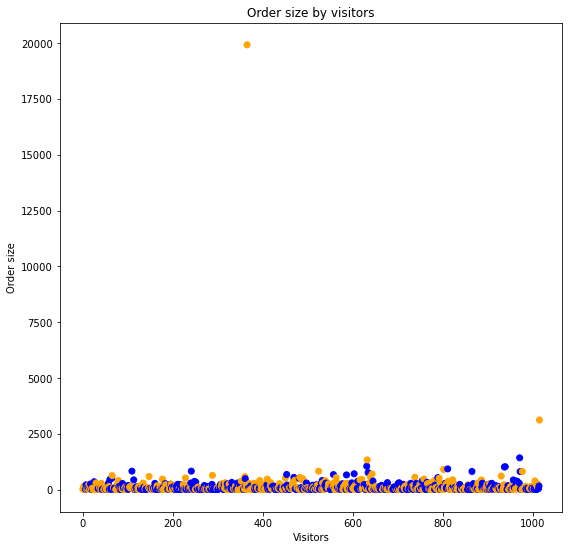

In [29]:
plt.figure(figsize=(9, 9))
x_values = pd.Series(range(0, len(orders['revenue'])))
colors = {'A':'blue', 'B':'orange'}

plt.scatter(x_values, orders['revenue'], c=orders['group'].apply(lambda x: colors[x])) 
plt.title('Order size by visitors')
plt.xlabel('Visitors')
plt.ylabel('Order size')
plt.show()

In [30]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 


[280.8   414.275 830.3  ]


In the chart above we can see the order size. Just as we expected, there are some very big orders. Such abnormally large orders distort the results and should be removed from tests.I have determined the percentile for the order revenue and we can see that no more than 5% of visitors spend more than 414,275. We will delete all orders that have a value greater than this figure.

## Hypothesis Testing

We have seen from the graphs that there is a difference in both the conversion rate and the order size between the two groups. However, we must verify if this difference is statistically significant, to do this we will use the Wilcoxon-Mann-Whitney Nonparametric Test.

First I will create two samples that contain each visitor Id and the number of orders placed. If the customer has not placed any order, the number of orders will be 0. In this way the average number of the orders will be equal to the sum of the number of orders divided by the number of visitors, which is nothing more than the conversion rate. The hypothesis we are going to test is that the average of these two groups is the same and therefore the conversion rate will also be the same.

In [31]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

### Finding the statistical significance of the difference in conversion between the groups 

Hypotheses:

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Significance level (alpha) = 0.05

In [32]:
alpha = 0.05

results = stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')
                             
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

print('Relative difference in conversion rate:', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value:  0.011018084110014696
Null hypothesis rejected: the difference is statistically significant
Relative difference in conversion rate: 0.160


We can see how Group B has a 16% higher conversion rate than Group A. The test confirms that this difference is statistically significant.

### Finding the statistical significance of the difference in average order size between the groups
Hypotheses:

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Alpha = 0.05

In [33]:
alpha = 0.05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')
                             
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 


print("Relative difference in average order size:", "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value:  0.8622329690015668
Failed to reject the null hypothesis: we can't make conclusions about the difference
Relative difference in average order size: 0.278


As for the average order size, we can see that for group B it is 27.8% larger than that of group A, but the test shows us that this difference is not statistically significant.

To see if the outliers, i.e. visitors with many orders or with expensive orders, have distorted the result, we will repeat the test without considering these visitors. To determine who these users are we will refer to the previously calculated percentiles and we will eliminate from our samples all users with more than 1 order or with orders more expensive than 415.

In [34]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 415]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Number of users with many or expensive orders:', abnormalUsers.shape)

Number of users with many or expensive orders: (86,)


In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

### Finding the statistical significance of the difference in conversion between the groups using filterd data

Hypotheses:

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Significance level (alpha) = 0.05

In [36]:
alpha = 0.05

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')
                             
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

print('Relative difference in conversion rate:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value:  0.01593020716573973
Null hypothesis rejected: the difference is statistically significant
Relative difference in conversion rate: 0.174


By repeating the test for the conversion rate we can see that the result has not changed: group B has a higher conversion rate than group A this time by 17.4%. The test again confirms that this difference is statistically significant.

### Finding the statistical significance of the difference in average order size between the groups using filtered data
Hypotheses:

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Alpha = 0.05

In [37]:
alpha = 0.05

results = stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')
                             
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 


print("Relative difference in average order size:", "{0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


p-value:  0.7711877309994826
Failed to reject the null hypothesis: we can't make conclusions about the difference
Relative difference in average order size: -0.033


Repeating the test for the average order size instead we see that this time it is group A to have orders larger than 3% but once again the test shows us that this difference is not statistically significant.

# Conclusion and Recommendations

### Conclusion

The test can be considered concluded: we have seen how the cumulative conversion rate for both groups had stabilized. The fluctuation in the cumulative order size was due to the presence of a few abnormally large orders in group B. 

The test can be considered partly a success, we have seen how the conversion rate of group B has improved both if we do the test considering the outliers and if we do not consider them.

Unfortunately, regarding the average revenues we have seen that there is no statistically significant difference between the two groups.
